<a href="https://colab.research.google.com/github/nandinib1999/credit-card-fraud-detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://drive.google.com/file/d/152cDq2FOaR5SLUdn_z8dLTcwNAYtetZT/view?usp=sharing
import gdown

url = 'https://drive.google.com/uc?id=152cDq2FOaR5SLUdn_z8dLTcwNAYtetZT'
output = 'creditcard.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=152cDq2FOaR5SLUdn_z8dLTcwNAYtetZT
To: /content/creditcard.csv
151MB [00:02, 61.8MB/s]


'creditcard.csv'

In [2]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Exploratory Data Analysis (EDA)

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

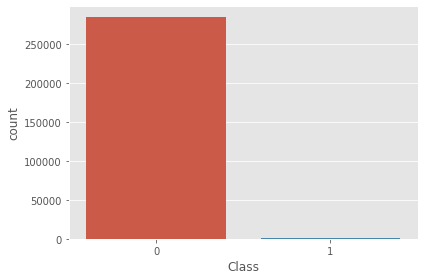

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.countplot(x='Class', data=df)
plt.tight_layout()

In [9]:
print(df['Class'].value_counts())
print('\nPercentage of fraudulent activity: {:.2%}'.format((df[df['Class'] == 1].shape[0] / df.shape[0])))

0    284315
1       492
Name: Class, dtype: int64

Percentage of fraudulent activity: 0.17%


## Time - Understanding it better

In [10]:
df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

Let's convert the time from seconds to hours to ease the interpretation.

In [11]:
df_copy = df.copy()
df_copy.loc[:,'Time'] = df_copy.Time / 3600
df_copy['Time'].tail(10)

284797    47.995000
284798    47.995000
284799    47.995278
284800    47.995556
284801    47.995833
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time, dtype: float64

What is the time of the last transaction, in days?

In [12]:
df_copy['Time'].max() / 24

1.9999074074074075

So the transactions occur over a two-day period. Next let's plot a histogram of transaction times, with one bin per hour:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transaction Times')

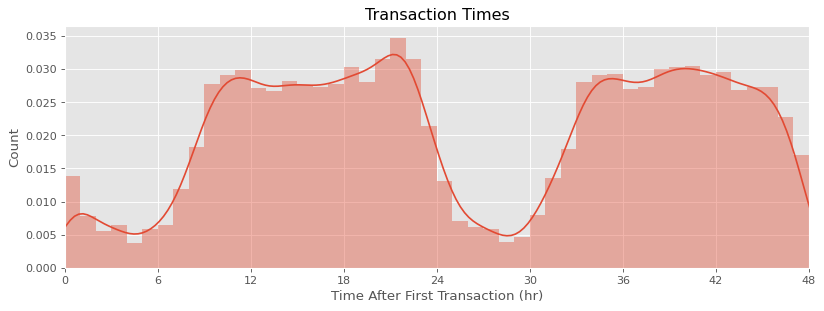

In [13]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(df_copy['Time'], bins=48)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('Count')
plt.title('Transaction Times')

Non-Fraudulent Transactions over the time

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transaction Times')

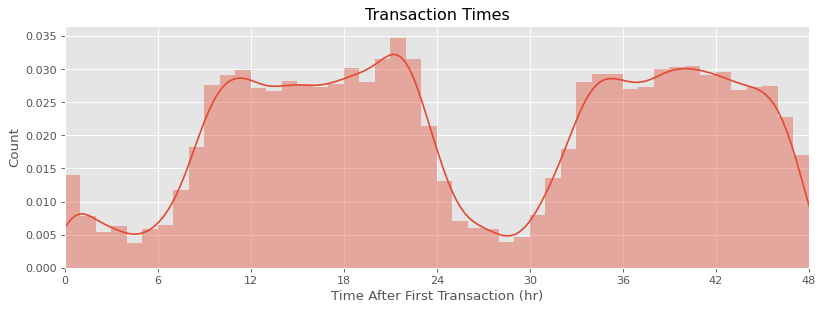

In [14]:
df_copy_nofraud = df_copy[df_copy['Class']==0] 
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(df_copy_nofraud['Time'], bins=48)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('Count')
plt.title('Transaction Times')

Fraudulent Transactions over the time

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transaction Times')

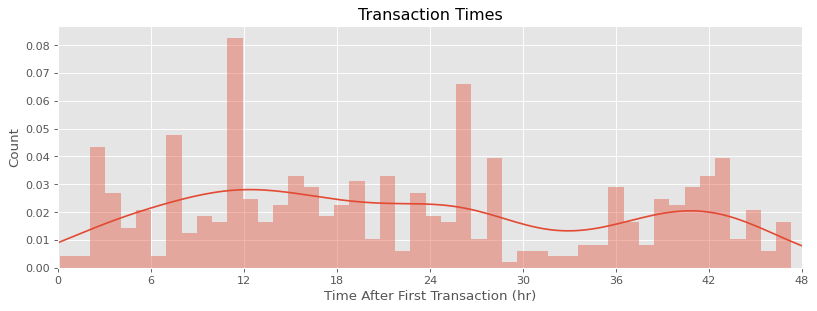

In [15]:
df_copy_fraud = df_copy[df_copy['Class']==1] 
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(df_copy_fraud['Time'], bins=48)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('Count')
plt.title('Transaction Times')

In regular transactions, we see two major drop in the transactions as given below:
1. 1 hr to 6 hr mark
2. 23 hr to 29 hr mark

Since the data spans over two days, we can conclude that the non-fraudulent/regular transactions drop significantly during the night hours. This makes sense as people sleep during these times and hence, the genuine transactions are very less.


However, in the fraudulent transactionns, we see no clear patterns in the activity over the hours. But we may observe that there is clearly a hike in the count of fraudulent transactions during night time.

## Amount - Understanding it better

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


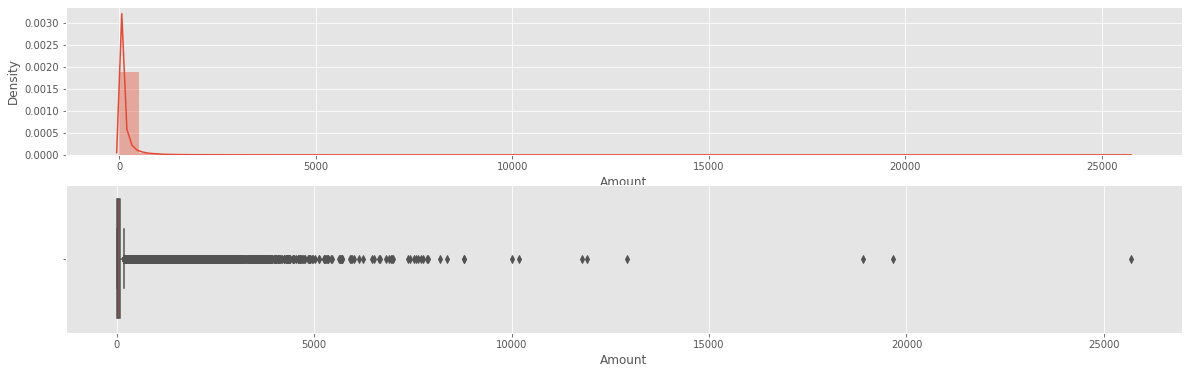

In [16]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20,6))
sns.distplot(df_copy.Amount, ax=ax1)
sns.boxplot(df_copy.Amount, ax=ax2)

The data is heavily right-skewed.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


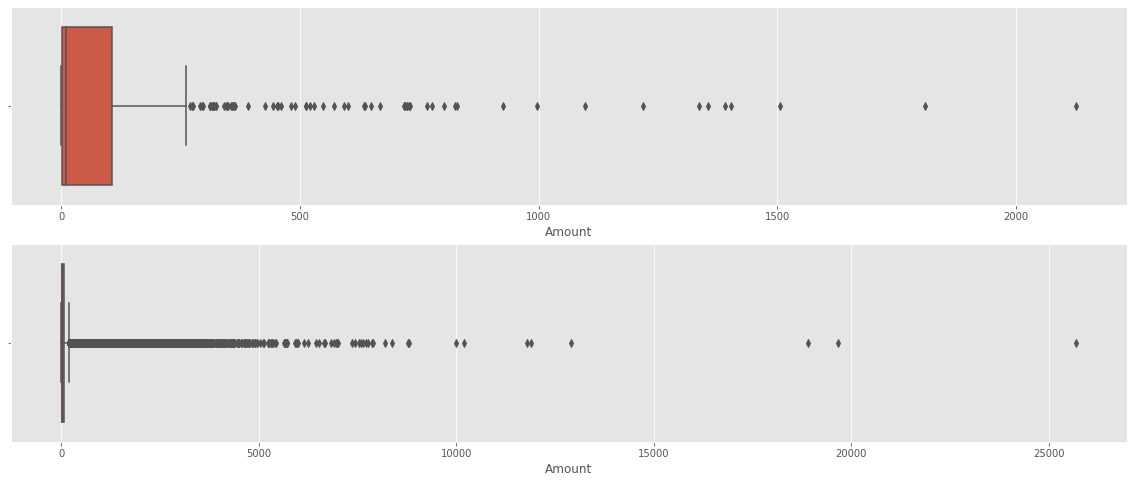

In [17]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20,8))
sns.boxplot(df_copy[df_copy['Class']==1].Amount, ax=ax1)
sns.boxplot(df_copy[df_copy['Class']==0].Amount, ax=ax2)

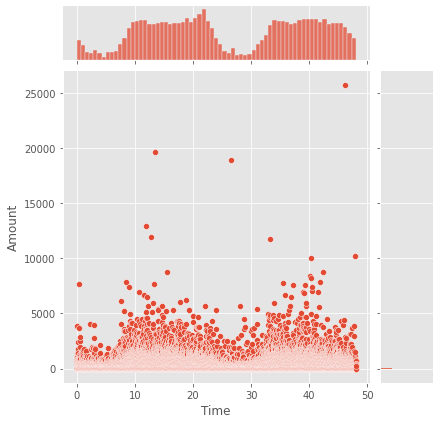

In [18]:
sns.jointplot(x=df_copy['Time'], y=df_copy['Amount'])

# Outlier Analysis

In [19]:
from scipy.stats import iqr
upper_limit = df_copy.Amount.quantile(0.75) + (1.5*iqr(df_copy.Amount))
print(upper_limit)
print(df_copy[df_copy.Amount>upper_limit]['Class'].value_counts())

184.5125
0    31813
1       91
Name: Class, dtype: int64


In this use-case, we do not want to remove any outliers as the data is sensitive 

In [20]:
df = df[df.Amount<=8000]
print(df['Class'].value_counts())
print('\nPercentage of fraudulent activity: {:.2%}'.format((df[df['Class'] == 1].shape[0] / df.shape[0])))

0    284303
1       492
Name: Class, dtype: int64

Percentage of fraudulent activity: 0.17%


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Genuine Transactions')

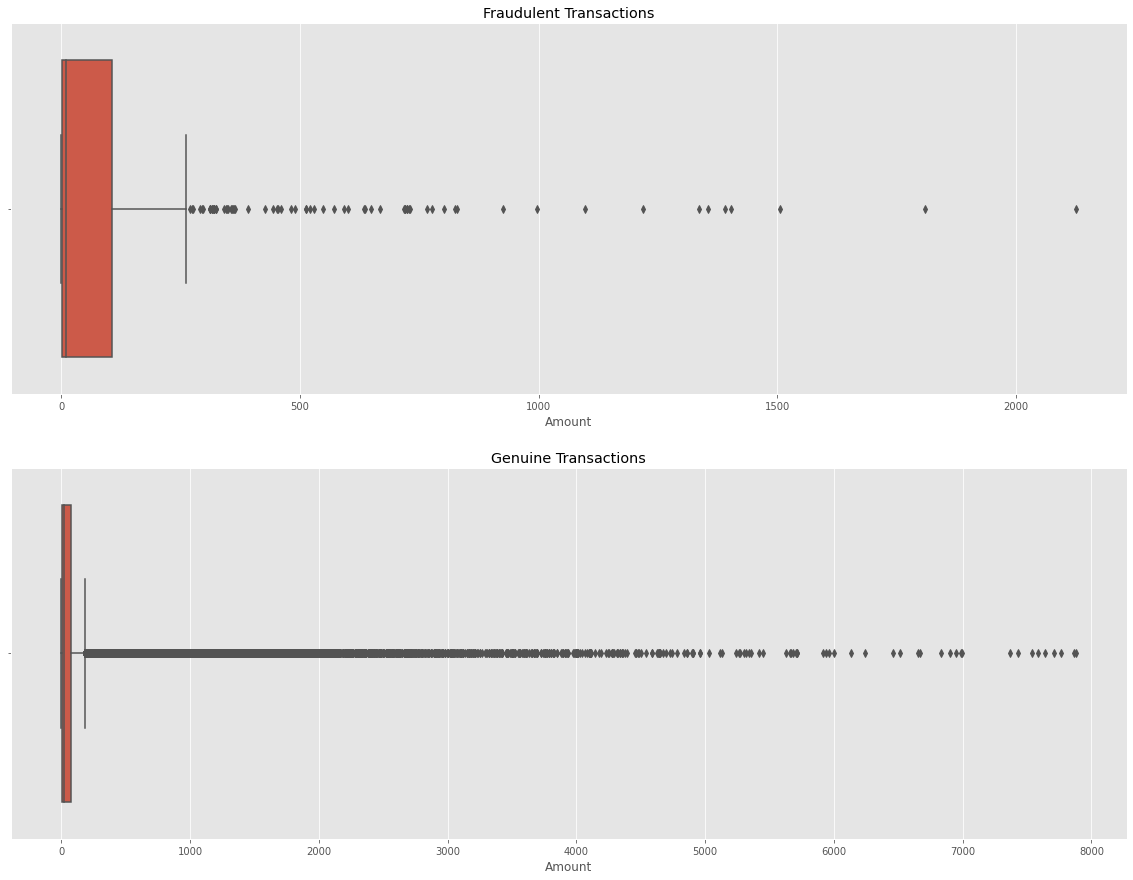

In [21]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20,15))
sns.boxplot(df[df['Class']==1].Amount, ax=ax1)
ax1.set_title('Fraudulent Transactions')
sns.boxplot(df[df['Class']==0].Amount, ax=ax2)
ax2.set_title('Genuine Transactions')

# Correlation Analysis

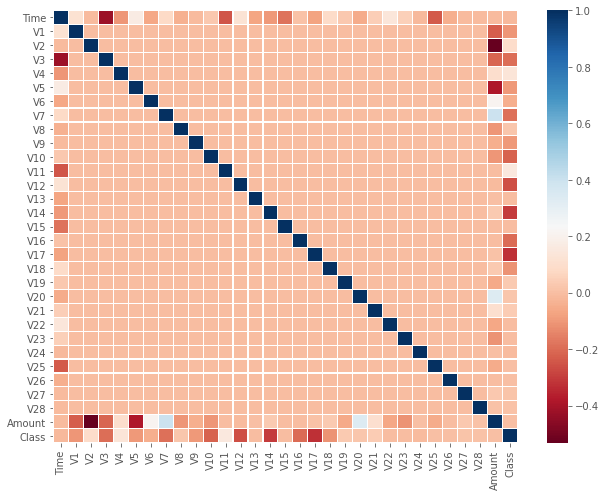

In [22]:
corr = df_copy.corr()
fig, ax = plt.subplots(figsize=(9, 7))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap="RdBu", ax=ax)
plt.tight_layout()

From the above heatmap, we can observe that the there are no strongly correlated features in the dataset. 

We see some negative correlation between PCA components and Time column of the dataset but it is not so significant that we need to take some action to handle it.

Other than that, all the correlation values lie somewhere in the neutral or zero-range. 

# **Handle Imbalanced Dataset**

The dataset we are using is heavily imbalanced i.e. the data points that belong to fraudulent transactions are around 0.16% only. Therefore, there are chances that the model may develop certain bias towards the non-fraudulent transactions and miss out on understanding the patterns behind fraudulent transactions due to their less count.

This will hazardous for our use-case as we cannot afford misclassifying the fraudulent transactions as genuine ones.

To deal with the problem of imbalanced datasets, we generally take two approaches:

1. **Undersampling** - In this approach, we reduce the count of the majority class and balance it with the minority class. 
2. **Oversampling** - In this approach, we generate synthetic data points for the minority class and try to balance it with the majority class.

Let us look at these approaches one by one.

## **Undersampling**

Undersampling techniques remove examples from the training dataset that belong to the majority class in order to better balance the class distribution.
These methods can be used directly on a training dataset that can then, in turn, be used to fit a machine learning model.

### Sampling the Data

In [23]:
non_fraud = df[df['Class'] == 0].sample(2000)
fraud = df[df['Class'] == 1]
print(len(non_fraud), len(fraud))

df_2 = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
x = df_2.drop(['Class'], axis = 1).values
y = df_2["Class"].values

2000 492


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Genuine Transactions')

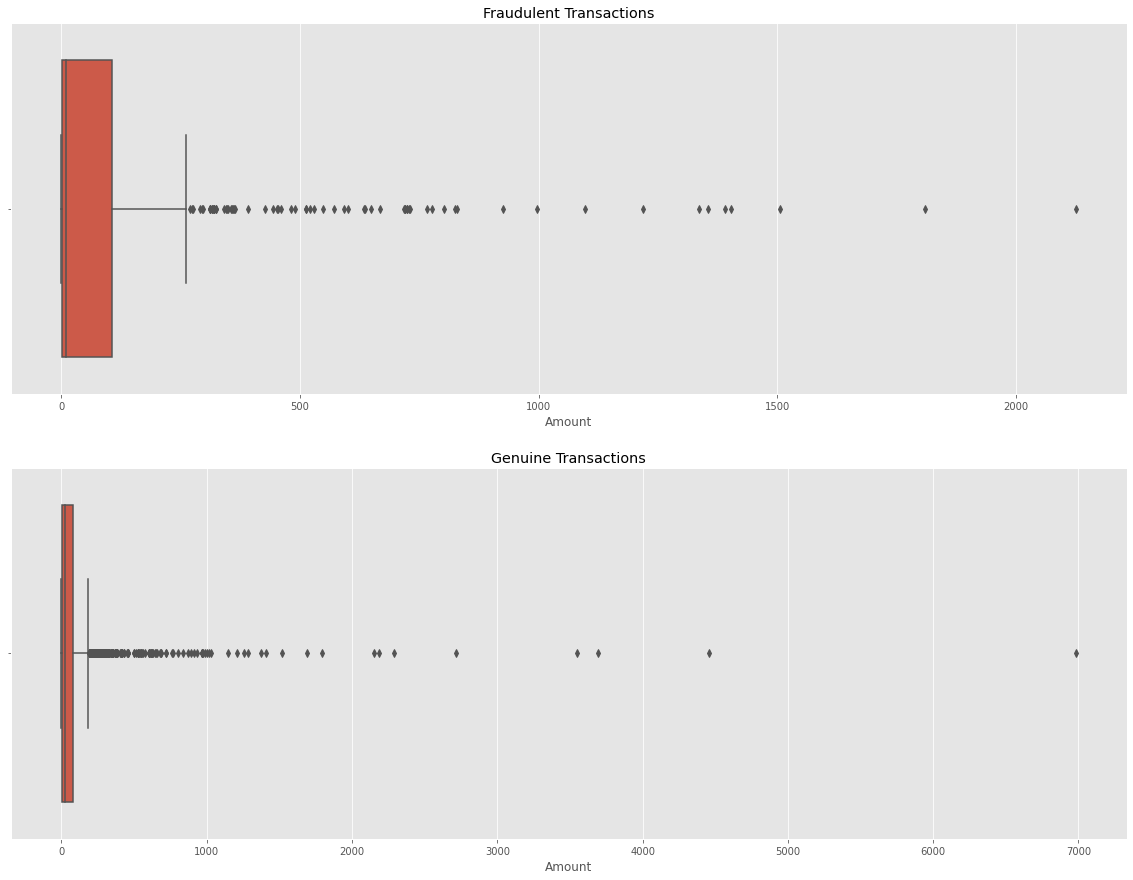

In [24]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20,15))
sns.boxplot(df_2[df_2['Class']==1].Amount, ax=ax1)
ax1.set_title('Fraudulent Transactions')
sns.boxplot(df_2[df_2['Class']==0].Amount, ax=ax2)
ax2.set_title('Genuine Transactions')

### Visualising the data

In [25]:
p = TSNE(n_components=2, random_state=24).fit_transform(x)
p

array([[ 53.69276  ,  -9.107888 ],
       [ 13.172574 ,  43.088467 ],
       [-21.070541 ,   8.173726 ],
       ...,
       [ -1.4743072,  60.736923 ],
       [-27.08027  ,  -0.9725729],
       [ 13.525018 , -23.710396 ]], dtype=float32)

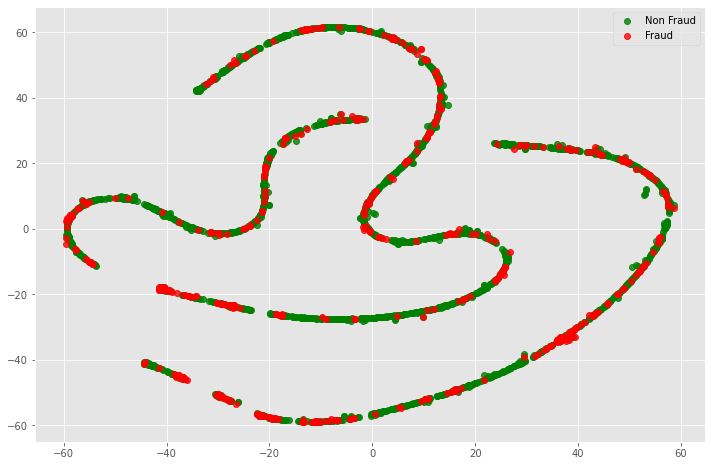

In [26]:
plt.figure(figsize=(12, 8))
plt.scatter(p[np.where(y == 0), 0], p[np.where(y == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
plt.scatter(p[np.where(y == 1), 0], p[np.where(y == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

plt.legend(loc='best');
plt.show();

### Data Scaling

In [27]:
x_scale = preprocessing.MinMaxScaler().fit_transform(x)
x_norm, x_fraud = x_scale[y == 0], x_scale[y == 1]

### Constructing the autoencoder

In [28]:
autoencoder = Sequential()

In [29]:
autoencoder.add(Dense(x.shape[1], activation='tanh'))
autoencoder.add(Dense(100, activation='tanh'))
autoencoder.add(Dense(50, activation='relu'))
autoencoder.add(Dense(50, activation='tanh'))
autoencoder.add(Dense(100, activation='tanh'))
autoencoder.add(Dense(x.shape[1], activation='relu'))

In [30]:
autoencoder.compile(optimizer="adadelta", loss="mse")

### Training the autoencoder

In [31]:
autoencoder.fit(x_norm, x_norm, 
                batch_size = 256, epochs = 10, 
                shuffle = True, validation_split = 0.20);

Epoch 1/10
7/7 [==============================] - 3s 62ms/step - loss: 0.3113 - val_loss: 0.3117
Epoch 2/10
7/7 [==============================] - 0s 8ms/step - loss: 0.3110 - val_loss: 0.3115
Epoch 3/10
7/7 [==============================] - 0s 7ms/step - loss: 0.3108 - val_loss: 0.3113
Epoch 4/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3105 - val_loss: 0.3111
Epoch 5/10
7/7 [==============================] - 0s 7ms/step - loss: 0.3102 - val_loss: 0.3108
Epoch 6/10
7/7 [==============================] - 0s 7ms/step - loss: 0.3096 - val_loss: 0.3106
Epoch 7/10
7/7 [==============================] - 0s 8ms/step - loss: 0.3097 - val_loss: 0.3104
Epoch 8/10
7/7 [==============================] - 0s 7ms/step - loss: 0.3096 - val_loss: 0.3102
Epoch 9/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3093 - val_loss: 0.3099
Epoch 10/10
7/7 [==============================] - 0s 7ms/step - loss: 0.3092 - val_loss: 0.3097


In [32]:
autoencoder.layers

### Latent Representations

In [33]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [34]:
norm_hid_rep = hidden_representation.predict(x_norm)
fraud_hid_rep = hidden_representation.predict(x_fraud)

In [35]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)

### Visualising the encoded distributions

In [36]:
p = TSNE(n_components=2, random_state=24).fit_transform(rep_x)

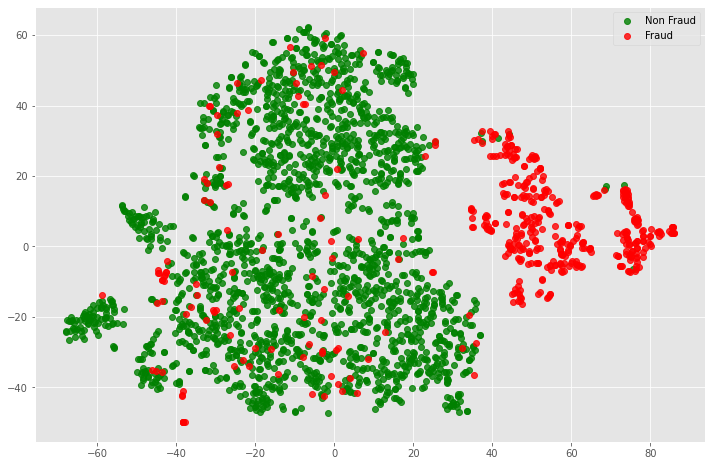

In [37]:
plt.figure(figsize=(12, 8))
plt.scatter(p[np.where(rep_y == 0), 0], p[np.where(rep_y == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
plt.scatter(p[np.where(rep_y == 1), 0], p[np.where(rep_y == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')
plt.legend(loc='best');
plt.show();

we can observe that now fraud and non-fraud transactions are pretty visibile and are linearly separable. Even the simpler models can be used to predict the target variable now

### Logistic Regression

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       486
         1.0       0.98      0.61      0.75       137

    accuracy                           0.91       623
   macro avg       0.94      0.80      0.85       623
weighted avg       0.92      0.91      0.90       623



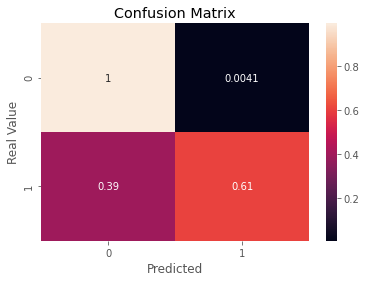

In [38]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)
pred_y = clf.predict(val_x)

# classification report
print(classification_report(val_y, pred_y))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(val_y, pred_y, normalize='true'), annot=True, ax=ax)

ax.set_title("Confusion Matrix")
ax.set_ylabel("Real Value")
ax.set_xlabel("Predicted")

plt.show()

### Decision Tree Classifier

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       486
         1.0       0.93      0.78      0.85       137

    accuracy                           0.94       623
   macro avg       0.94      0.88      0.91       623
weighted avg       0.94      0.94      0.94       623



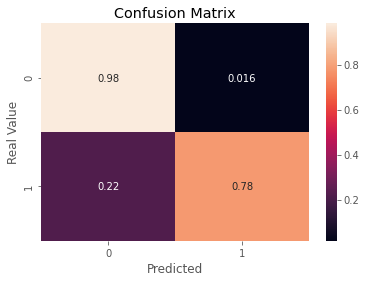

In [39]:
model_tree = DecisionTreeClassifier(max_depth=4, criterion="entropy")

model_tree.fit(train_x, train_y)

y_pred_tree = model_tree.predict(val_x)

# classification report
print(classification_report(val_y, y_pred_tree))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(val_y, y_pred_tree, normalize='true'), annot=True, ax=ax)

ax.set_title("Confusion Matrix")
ax.set_ylabel("Real Value")
ax.set_xlabel("Predicted")

plt.show()

## Oversampling

In [40]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [41]:
y = df["Class"].values

### Scaling the data

In [42]:
from sklearn.preprocessing import StandardScaler
scaler_df = df.drop('Class',axis=1)
scaler_df_final = StandardScaler().fit_transform(scaler_df)
scaler_df_final = pd.DataFrame(scaler_df_final)
scaler_df_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-1.996575,-0.696816,-0.045384,1.678248,0.974808,-0.250089,0.349938,0.199430,0.082508,0.331104,0.083220,-0.540398,-0.618468,-0.996156,-0.324640,1.604539,-0.537127,0.244862,0.030847,0.496449,0.336219,-0.024881,0.383179,-0.180467,0.110592,0.246842,-0.392328,0.335852,-0.064173,0.264970
1,-1.996575,0.609874,0.162046,0.109717,0.317187,0.043409,-0.061783,-0.064257,0.071109,-0.232568,-0.153690,1.580158,1.066274,0.491590,-0.149965,0.694652,0.530083,-0.135223,-0.218737,-0.179293,-0.091675,-0.308309,-0.881540,0.164117,-0.561159,0.321101,0.261108,-0.022245,0.044764,-0.364880
2,-1.996554,-0.696072,-0.821033,1.173155,0.268838,-0.371572,1.361283,0.656459,0.207409,-1.378853,0.190613,0.611918,0.066110,0.720907,-0.173102,2.563678,-3.300974,1.307011,-0.144749,-2.780207,0.701460,0.338924,1.064646,1.479115,-1.138218,-0.630061,-0.288573,-0.138737,-0.182005,1.246804
3,-1.996554,-0.495289,-0.114201,1.186249,-0.610160,-0.008408,0.943102,0.197782,0.316198,-1.262670,-0.050732,-0.221861,0.178368,0.510344,-0.300384,-0.689901,-1.210186,-0.805589,2.345858,-1.515151,-0.277194,-0.147824,0.007060,-0.310395,-1.941288,1.244185,-0.460395,0.157897,0.187061,0.153000
4,-1.996533,-0.593591,0.536342,1.024572,0.285282,-0.300835,0.072963,0.492053,-0.227050,0.744340,0.691909,-0.806156,0.538700,1.352549,-1.168296,0.191486,-0.515480,-0.279153,-0.045507,0.987476,0.546004,-0.012756,1.101351,-0.224376,0.233356,-0.396251,1.041884,0.551562,0.655042,-0.076383


In [43]:
x = scaler_df_final.values

### Splitting the data into train and test

In [44]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25)

In [45]:
df_real = pd.DataFrame(train_x, columns = scaler_df.columns)
df_real['Class'] = train_y

### Visualizing the training data before oversampling

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Genuine Transactions')

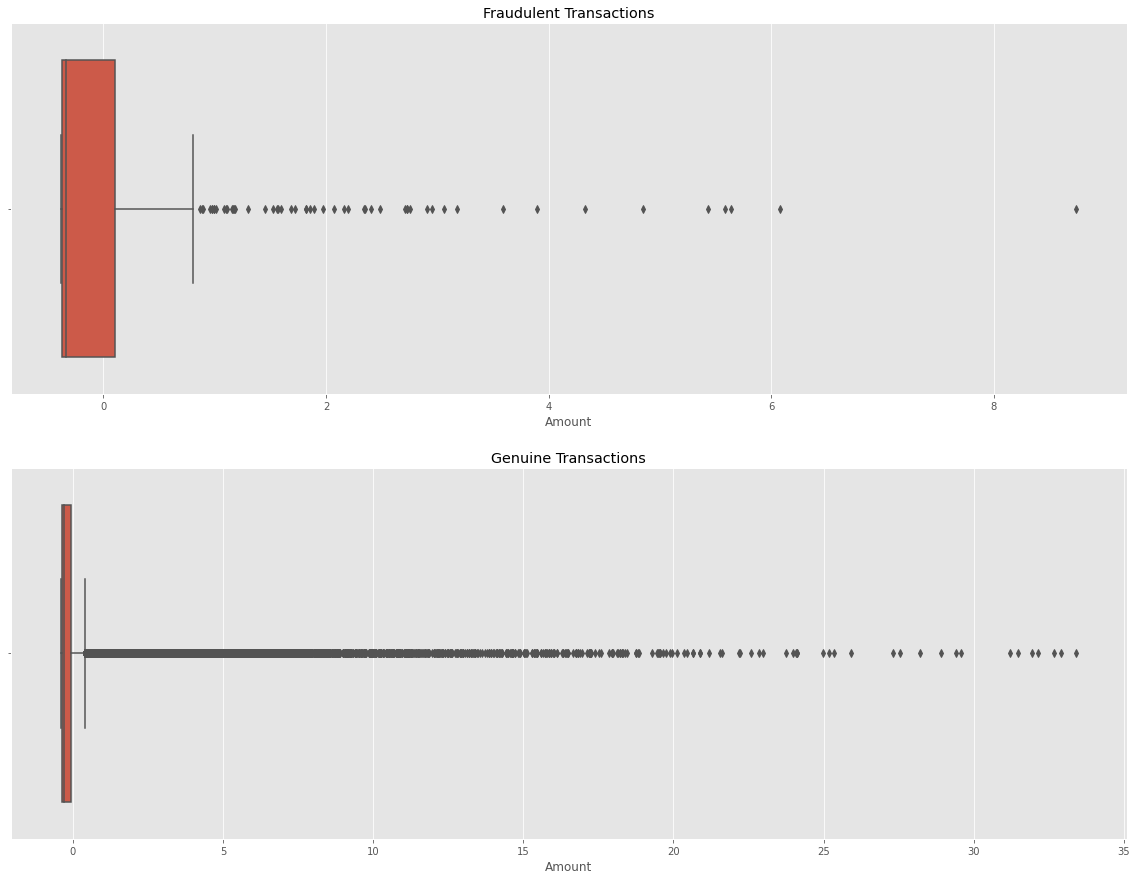

In [46]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20,15))
sns.boxplot(df_real[df_real['Class']==1].Amount, ax=ax1)
ax1.set_title('Fraudulent Transactions')
sns.boxplot(df_real[df_real['Class']==0].Amount, ax=ax2)
ax2.set_title('Genuine Transactions')

### Oversampling using SMOTE

In [47]:
over = SMOTE(sampling_strategy=0.5)

steps = [
    ('over',over)
]
xs, ys = Pipeline(steps=steps).fit_resample(train_x, train_y)
class_cnt = dict(Counter(ys))
print('The new count of classes:', class_cnt)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The new count of classes: {0: 213210, 1: 106605}


In [48]:
df_oversampler = pd.DataFrame(xs, columns = scaler_df.columns)
df_oversampler['Class'] = ys

### Visualizing the data after oversampling

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Genuine Transactions')

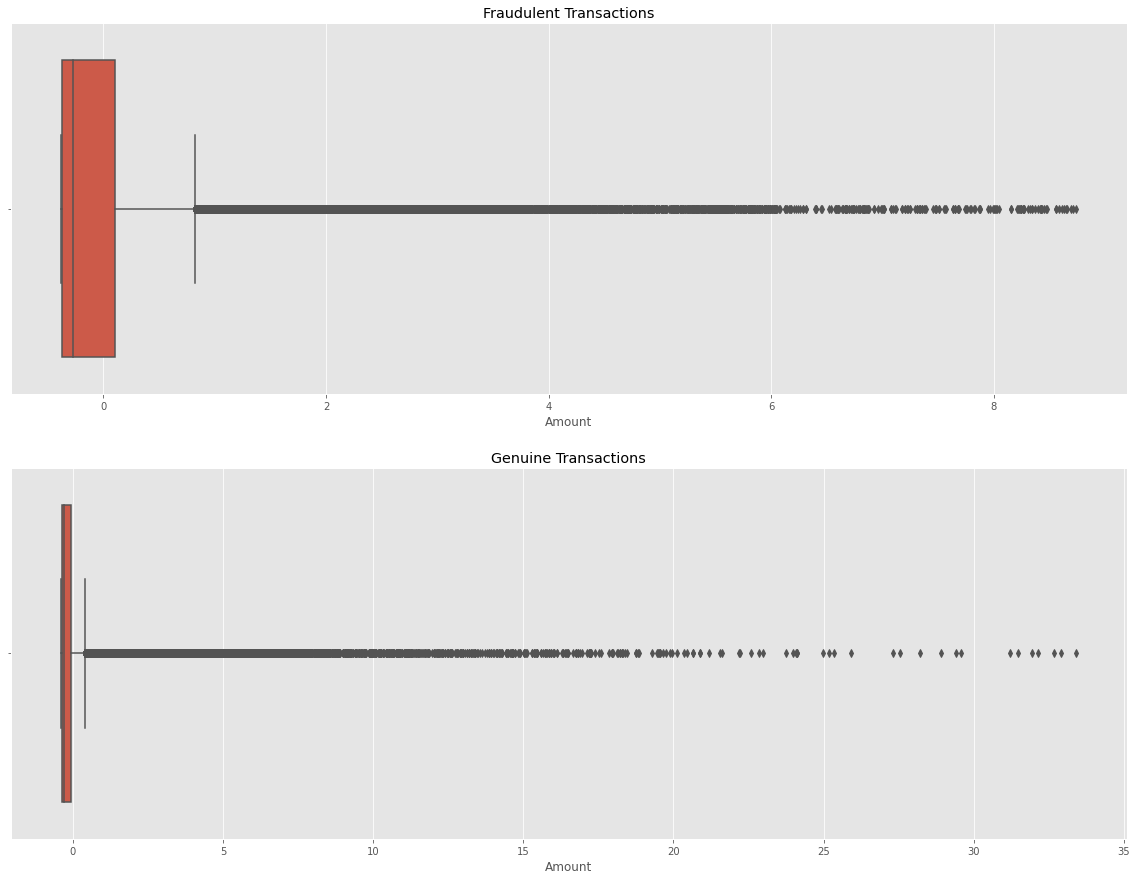

In [49]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20,15))
sns.boxplot(df_oversampler[df_oversampler['Class']==1].Amount, ax=ax1)
ax1.set_title('Fraudulent Transactions')
sns.boxplot(df_oversampler[df_oversampler['Class']==0].Amount, ax=ax2)
ax2.set_title('Genuine Transactions')

### Logistic Regression

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71093
           1       0.09      0.91      0.17       106

    accuracy                           0.99     71199
   macro avg       0.55      0.95      0.58     71199
weighted avg       1.00      0.99      0.99     71199



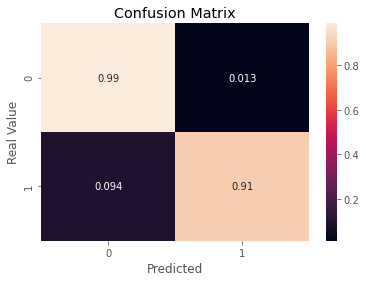

In [50]:
reg = LogisticRegression(random_state = 42)
reg.fit(xs, ys)
y_test_predict = reg.predict(test_x)

# classification report
print(classification_report(test_y, y_test_predict))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(test_y, y_test_predict, normalize='true'), annot=True, ax=ax)

ax.set_title("Confusion Matrix")
ax.set_ylabel("Real Value")
ax.set_xlabel("Predicted")

plt.show()

### Decision Tree Classifier

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71093
           1       0.08      0.88      0.14       106

    accuracy                           0.98     71199
   macro avg       0.54      0.93      0.57     71199
weighted avg       1.00      0.98      0.99     71199



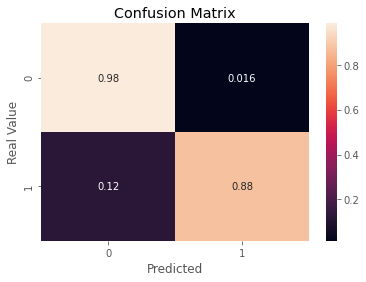

In [51]:
model_tree = DecisionTreeClassifier(max_depth=4, criterion="entropy")

model_tree.fit(xs, ys)

y_pred_tree = model_tree.predict(test_x)

# classification report
print(classification_report(test_y, y_pred_tree))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(test_y, y_pred_tree, normalize='true'), annot=True, ax=ax)

ax.set_title("Confusion Matrix")
ax.set_ylabel("Real Value")
ax.set_xlabel("Predicted")

plt.show()